Make an In-Sample Forecast0


In [9]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)

df.head(10)


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
5,1960-06,13791
6,1960-07,9498
7,1960-08,8251
8,1960-09,7049
9,1960-10,9545


In [19]:
df.tail()

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [8]:
df.info()
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
(108, 2)


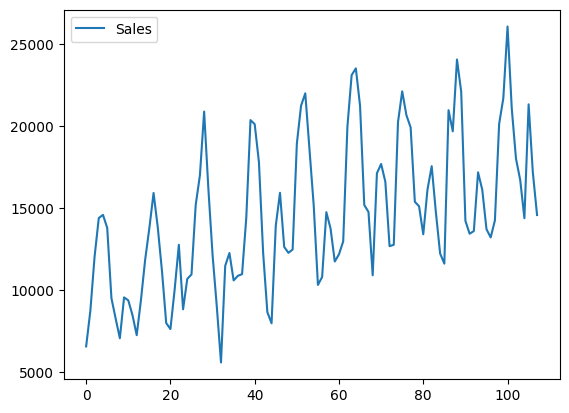

In [10]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

In [11]:
...
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [14]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from prophet import Prophet
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

11:28:05 - cmdstanpy - INFO - Chain [1] start processing
11:28:05 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
...
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [16]:
forecast = model.predict(future)

In [17]:
...
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14365.838146  12687.103809  15975.032432
1 1968-02-01  14940.305749  13436.186646  16583.632812
2 1968-03-01  20882.028850  19270.093515  22514.471717
3 1968-04-01  22900.416536  21312.385594  24346.480716
4 1968-05-01  24201.080202  22630.211122  25703.165954


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14365.838146  12687.103809  15975.032432
1 1968-02-01  14940.305749  13436.186646  16583.632812
2 1968-03-01  20882.028850  19270.093515  22514.471717
3 1968-04-01  22900.416536  21312.385594  24346.480716
4 1968-05-01  24201.080202  22630.211122  25703.165954


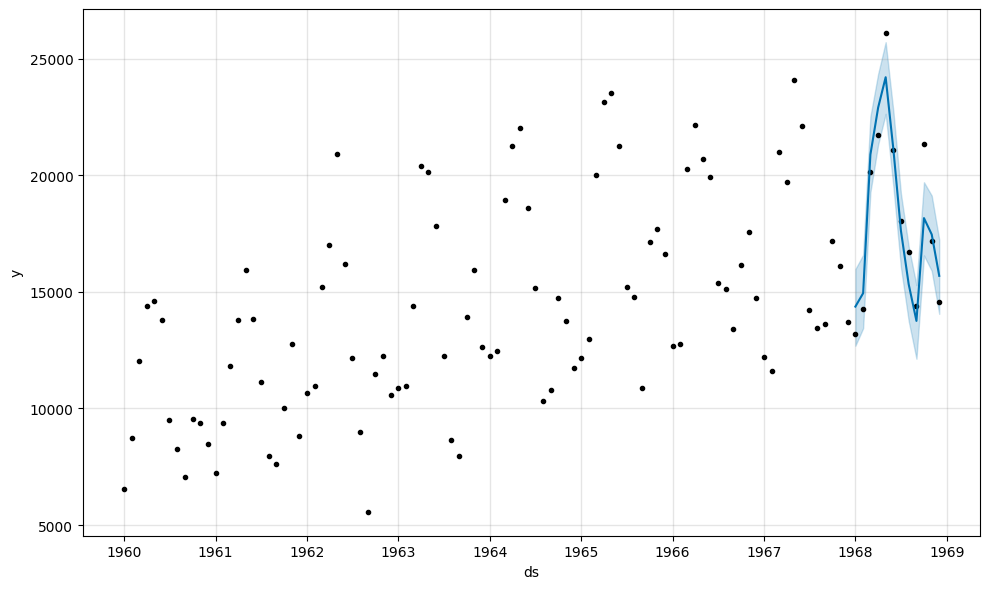

In [18]:
...
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

11:24:19 - cmdstanpy - INFO - Chain [1] start processing
11:24:19 - cmdstanpy - INFO - Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14365.838146  12842.586992  15961.447008
1 1968-02-01  14940.305749  13257.385382  16453.712965
2 1968-03-01  20882.028850  19347.829527  22486.794364
3 1968-04-01  22900.416536  21345.937701  24576.670890
4 1968-05-01  24201.080202  22665.812132  25746.669041


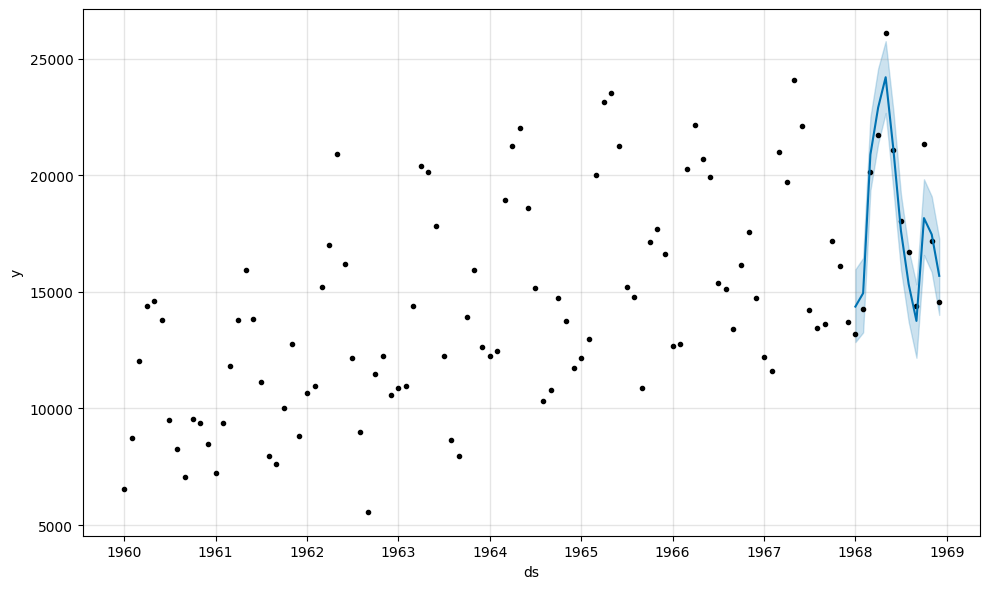

In [4]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

Make an Out-of-Sample Forecast


In [20]:
...
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
	print("Future List:", future)
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

Future List: [['1969-01']]
Future List: [['1969-01'], ['1969-02']]
Future List: [['1969-01'], ['1969-02'], ['1969-03']]
Future List: [['1969-01'], ['1969-02'], ['1969-03'], ['1969-04']]
Future List: [['1969-01'], ['1969-02'], ['1969-03'], ['1969-04'], ['1969-05']]
Future List: [['1969-01'], ['1969-02'], ['1969-03'], ['1969-04'], ['1969-05'], ['1969-06']]
Future List: [['1969-01'], ['1969-02'], ['1969-03'], ['1969-04'], ['1969-05'], ['1969-06'], ['1969-07']]
Future List: [['1969-01'], ['1969-02'], ['1969-03'], ['1969-04'], ['1969-05'], ['1969-06'], ['1969-07'], ['1969-08']]
Future List: [['1969-01'], ['1969-02'], ['1969-03'], ['1969-04'], ['1969-05'], ['1969-06'], ['1969-07'], ['1969-08'], ['1969-09']]
Future List: [['1969-01'], ['1969-02'], ['1969-03'], ['1969-04'], ['1969-05'], ['1969-06'], ['1969-07'], ['1969-08'], ['1969-09'], ['1969-10']]
Future List: [['1969-01'], ['1969-02'], ['1969-03'], ['1969-04'], ['1969-05'], ['1969-06'], ['1969-07'], ['1969-08'], ['1969-09'], ['1969-10'], [

11:38:03 - cmdstanpy - INFO - Chain [1] start processing
11:38:03 - cmdstanpy - INFO - Chain [1] done processing


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15414.370948  13896.175291  17002.188204
1 1969-02-01  16182.031762  14621.191428  17757.762606
2 1969-03-01  21399.275915  19801.328077  22950.083646
3 1969-04-01  23514.723288  21922.502016  24932.377245
4 1969-05-01  25020.049095  23367.177554  26553.472970


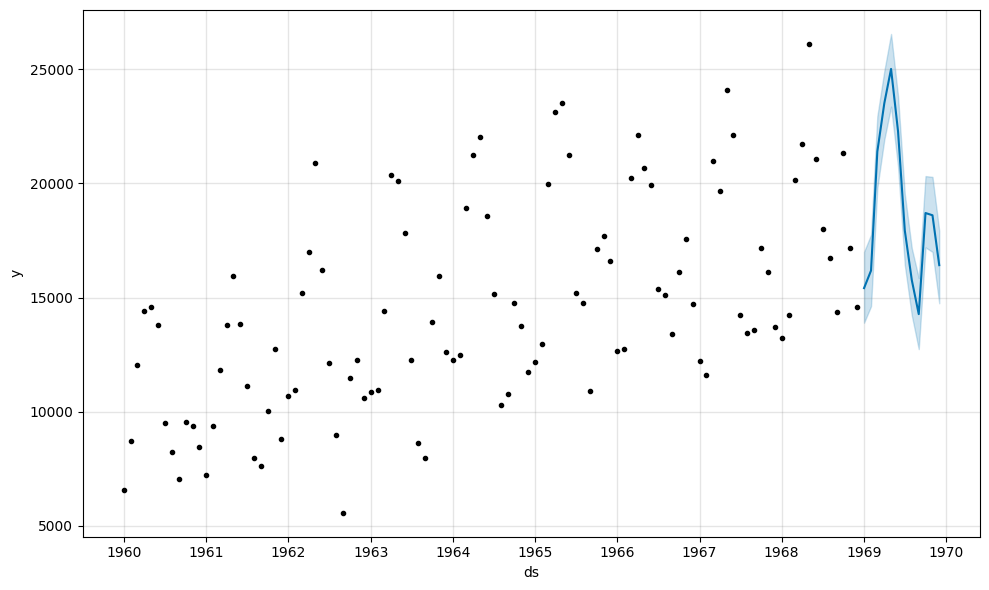

In [22]:
# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

Manually Evaluate Forecast Model


In [23]:
...
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [25]:
from sklearn.metrics import mean_absolute_error

# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1376.580


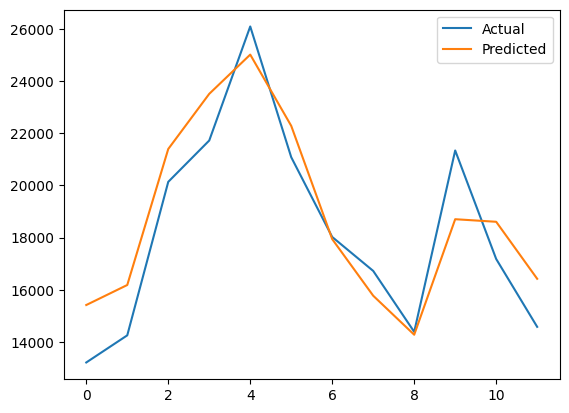

In [26]:
...
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

11:41:54 - cmdstanpy - INFO - Chain [1] start processing


           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


11:41:55 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1336.813


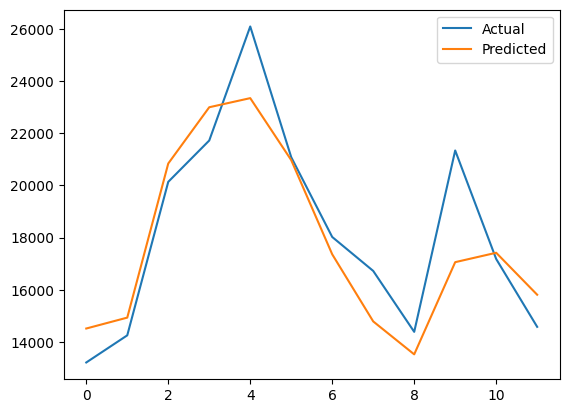

In [28]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()